In [1]:
import sys
MAX = sys.maxsize

In [2]:
def pairing(alist):
    if len(alist) % 2 == 1:
        print('Odd number of items in the list! Impossible to pair!')
        return None
    if len(alist) == 2:
        return [[alist]]
    else:
        result = []
        for i in range(1, len(alist)):
            remaining = alist[1:i] + alist[i+1:]
            toadd = pairing(remaining)
            for j in range(len(toadd)):
                result.append([[alist[0], alist[i]]] + toadd[j])
        return result

In [3]:
class Vertex:
    def __init__(self, vname, distance=MAX, state=None):
        # vname == string object
        # name of the vertex
        self.vname = vname
        # nbrs == dictionary object
        # neighours connected to the vertex
        # key == name of neighbour vertex, value == weight of edge
        self.nbrs = {}
        self.dist = distance
        self.state = state
        self.pv = None
 
    def __str__(self):
        return self.vname + ' is connected to: ' + str([x for x in self.nbrs])
    
    def getName(self):
        # get name of the vertex
        return self.vname
    
    def addNBR(self, nbr, weight=0):
        # add new neighbouring vertex by name
        self.nbrs[nbr] = weight

    def getNBRs(self):
        # return names of all neighbouring vertices
        return self.nbrs.keys()
    
    def getDegree(self):
        return len(self.nbrs)
    
    def setDistance(self, distance):
        self.dist = distance
    
    def getDistance(self):
        return self.dist
    
    def setState(self, state):
        self.state = state
    
    def getState(self):
        return self.state
    
    def setPV(self, pvname):
        # set previous vertex connected to the current vertex
        self.pv = pvname
    
    def getPV(self):
        return self.pv
    
    def getWeight(self, nbr):
        if nbr in self.nbrs:
            return self.nbrs[nbr]
        else:
            print('Vertex %s not connected to Vertex %s!' %(nbr, self.vname))
            return

In [4]:
class Graph:
    def __init__(self):
        # vlist == dictionary object
        # key == name of vertex in the graph
        # value == list of neighbours of that vertex
        self.vlist = {}
        self.vnum = 0
    
    def __contains__(self, vname):
        # check if a vertex is in the graph
        return vname in self.vlist
    
    def __iter__(self):
        # iterate over vertices as Vertex Class objects
        return iter(self.vlist.values())
    
    def addVertex(self, vname):
        # add a new vertex by name
        self.vnum += 1
        self.vlist[vname] = Vertex(vname)
    
    def getVertex(self, vname):
        # get an existing vertex by name
        if vname in self.vlist:
            return self.vlist[vname]
        else:
            return None
        
    def numVertex(self):
        # return number of vertices in the graph
        return self.vnum
    
    def addEdge(self, V1, V2, weight=0):
        # add an edge to the graph
        # if any one of the vertices forming the edge does not exist
        # add new vertex to the graph before adding the edge
        if V1 not in self.vlist:
            self.addVertex(V1)
        if V2 not in self.vlist:
            self.addVertex(V2)
        self.vlist[V1].addNBR(self.vlist[V2].getName(), weight)
        self.vlist[V2].addNBR(self.vlist[V1].getName(), weight)
    
    def getWeight(self, fV, tV):
        # get weight of an edge by two vertex names
        if tV in self.vlist[fV].nbrs:
            return self.vlist[fV].nbrs[tV]
        else:
            print('Oops! ' + fV + ' is not connected to ' + tV)
            return None
    
    def getVertices(self):
        # return all vertices in the graph as a list
        return self.vlist.keys()
        
    def getTotalWeight(self):
        sum = 0
        for vname, v in self.vlist.items():
            for w in v.nbrs:
                sum += v.nbrs[w]
        return sum/2
    # note that the graph that we study is not a digraph
    # each edge is connected to two vertices, so there is an overcounting by a factor of two
    
    def reset(self):
        for vertex in g:
            vertex.setDistance(MAX)
            vertex.setPV(None)
            vertex.setState(None)
    
    def dijkstra(self, start, end=None, giveinfo=False):
        # use dijkstra algorithm to find the shortest path from start vertex to end vertex
        # start vertex must be specified
        # if giveinfo is True, the function prints out the detailed information for this path and its length, but returns None
        # if giveinfo is False, the function returns a list, consisting of the length of the path and a string describing this path
        # when end vertex is not specified, the functions finds the shortest path from start vertex to any other vertex in the graph
        # if giveinfo is True, the function prints out the detailed information for the paths and the lengths
        # if giveinfo is False, the function prints out nothing and returns nothing
        self.reset()
        self.getVertex(start).setDistance(0)
        self.getVertex(start).setPV(None)
        self.getVertex(start).setState('done')
        current = start
        count = self.numVertex()
        while count > 1:
            for next_v in self.getVertex(current).getNBRs():
                new_dist = self.getVertex(current).getDistance() + self.getVertex(current).getWeight(next_v)
                if self.getVertex(next_v).getState() != 'done' and \
                new_dist < self.getVertex(next_v).getDistance():
                    self.getVertex(next_v).setDistance(new_dist)
                    self.getVertex(next_v).setPV(current)
        
            minimum = MAX
            for vertex in self:
                if vertex.getState() != 'done':
                    if vertex.getDistance() < minimum:
                        minimum = vertex.getDistance()
                        next_done = vertex.getName()
            current = next_done
            self.getVertex(current).setState('done')  
            count -= 1 
        if end:
            path = end
            last = self.getVertex(end)
            while last.getPV() != None:
                path = last.getPV() + path
                last = self.getVertex(last.getPV())
            if giveinfo:
                print(start + ' to ' + end + ':')
                print('    Shortest path: ' + path)
                print('    Length = ' + str(self.getVertex(end).getDistance()))
                return None
            return [self.getVertex(end).getDistance(), path]
        else:
            if giveinfo:
                print(start + ' to \t Path \t Length')
            for vertex in self:
                path = vertex.getName()
                last = vertex
                while last.getPV() != None:
                    path = last.getPV() + path
                    last = self.getVertex(last.getPV())
                if giveinfo:
                    print(' ', vertex.getName(), '\t', path, '\t', vertex.getDistance())
            return None
        
    def routeInspection(self, begin=None, finish=None):
        # use route inspection algorithm to find the minimum cost to traverse all edges on a graph
        # if no begin and finish vertex specified, then it is assumed that one must start and finish at the same vertex
        # otherwise, the route starts at the begin vertex and ends at the finish vertex
        # the route inspection algorithm identifies all vertices with odd degrees
        # by pairing up these vertices, we evaluate the cost of repeating the corresponding edges
        # the combination with the minimum cost is the optimal solution
        # the algorithm then identifies the actual edges that need to be traversed twice and computes the extra cost
        # total length of the inspection route is the sum of the graph's total weight and the extra cost of repetition
        oddvertices = []
        for vertex in self:
            if (vertex.getName() == begin or vertex.getName()== finish) and begin != finish:
                if vertex.getDegree() % 2 == 0:
                    oddvertices.append(vertex.getName())
            elif vertex.getDegree() % 2 == 1:
                oddvertices.append(vertex.getName())
        if len(oddvertices) == 0:
            print('This is an Eulerian graph.')
            print('The graph is traversable with no need to repeat any edge.')
            print('Length of the inspection route is: ', self.getTotalWeight())
        else:
            print('Odd vertices are:')
            print('  ', oddvertices)
            print('All possible pairings:')
            min_repeat = MAX
            best_pairs = []
            pairings = pairing(oddvertices)
            if len(pairings) == 1:
                best_pairs = pairings[0]
                start = pairings[0][0][0]
                end = pairings[0][0][1]
                min_repeat = self.dijkstra(start, end)[0]
                print('  ', best_pairs, ' = ', min_repeat)
            else:
                for pairs in pairings:
                    print('  ', pairs, end=' = ')
                    repeat = 0
                    for pair in pairs:
                        start = pair[0]
                        end = pair[1]
                        extra_length = self.dijkstra(start, end)[0]
                        if pair == pairs[-1]:
                            print(extra_length, end=' = ')
                        else:
                            print(extra_length, end=' + ')
                        repeat += extra_length
                    if repeat < min_repeat:
                        min_repeat = repeat
                        best_pairs = pairs
                    print(repeat)
            print('Optimal pairing is:')
            print('  ',best_pairs)
            print('Edges that need to be traversed twice are:')
            print('    ', end='')
            for best_pair in best_pairs:
                start = best_pair[0]
                end = best_pair[1]
                path = self.dijkstra(start, end)[1]
                for i in range(len(path)-1):
                    print(path[i:i+2], end=' ')
            print('')
            print('Length of inspection route =', end=' ')
            print(self.getTotalWeight(), '+', min_repeat, end=' = ')
            print(self.getTotalWeight() + min_repeat)

## Example 1

Question from Pearson Edexcel Past Papers

WDM11/01 Spring 2020

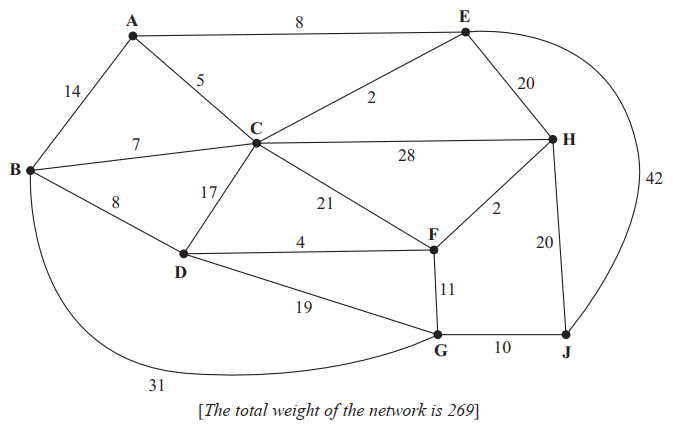

In [5]:
g = Graph()
g.addEdge('A', 'B', 14)
g.addEdge('A', 'C', 5)
g.addEdge('A', 'E', 8)
g.addEdge('B', 'C', 7)
g.addEdge('B', 'D', 8)
g.addEdge('B', 'G', 31)
g.addEdge('C', 'D', 17)
g.addEdge('C', 'E', 2)
g.addEdge('C', 'F', 21)
g.addEdge('C', 'H', 28)
g.addEdge('D', 'F', 4)
g.addEdge('D', 'G', 19)
g.addEdge('E', 'H', 20)
g.addEdge('E', 'J', 42)
g.addEdge('F', 'G', 11)
g.addEdge('F', 'H', 2)
g.addEdge('G', 'J', 10)
g.addEdge('H', 'J', 20)

In [6]:
g.dijkstra('B', None, True)
# find shortest path from vertex B to any other vertex in the graph

B to 	 Path 	 Length
  A 	 BCA 	 12
  B 	 B 	 0
  C 	 BC 	 7
  E 	 BCE 	 9
  D 	 BD 	 8
  G 	 BDFG 	 23
  F 	 BDF 	 12
  H 	 BDFH 	 14
  J 	 BDFGJ 	 33


In [7]:
g.dijkstra('A', 'J', True)
# find the shortest path from vertex A to vertex J

A to J:
    Shortest path: ACBDFGJ
    Length = 45


In [8]:
g.routeInspection('H', 'D')
# inspection route starting from vertex H and finishing at vertex D

Odd vertices are:
   ['A', 'D', 'H', 'J']
All possible pairings:
   [['A', 'D'], ['H', 'J']] = 20 + 20 = 40
   [['A', 'H'], ['D', 'J']] = 26 + 25 = 51
   [['A', 'J'], ['D', 'H']] = 45 + 6 = 51
Optimal pairing is:
   [['A', 'D'], ['H', 'J']]
Edges that need to be traversed twice are:
    AC CB BD HJ 
Length of inspection route = 269.0 + 40 = 309.0


In [9]:
g.routeInspection()
# inspection route starting and finishing at the same vertex

Odd vertices are:
   ['A', 'J']
All possible pairings:
   [['A', 'J']]  =  45
Optimal pairing is:
   [['A', 'J']]
Edges that need to be traversed twice are:
    AC CB BD DF FG GJ 
Length of inspection route = 269.0 + 45 = 314.0
